<a href="https://colab.research.google.com/github/Chaiwat-Aepsuk/AI-2025/blob/main/certificate_decision_tree_cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# งานเพื่อวัดผลการเรียนรู้ของผู้เข้าอบรม (60 คะแนน)
Cat and Dog

เพื่อให้เกิดความง่ายในการทำความเข้าใจ **ผมจะขอเรียก DataFrame ว่าตาราง (Table)**

In [1]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลของสุนัข และแมวตามคุณลักษณะ (Features) ประกอบด้วย
# หน้ากลม (face), หูตั้ง (ear), สีน้ำตาล (brown), แลบลิ้น (tongue), หนวดยาว (whisker)
data = pd.DataFrame({
    'face':[0, 0, 0, 1, 1, 0],                # หน้ากลม
    'ear':[1, 0, 0, 1, 1, 1],                 # หูตั้ง
    'brown':[1, 1, 1, 0, 1, 0],               # สีน้ำตาล
    'tongue':[1, 1, 0, 0, 0, 0],              # แลบลิ้น
    'whisker':[1, 0, 0, 1, 1, 1],             # หนวดยาว
    'target':['dog', 'dog', 'dog', 'cat', 'cat', 'cat'] # ค่าเป้าหมาย (target) หรือ คลาส (class) หรือ ฉลาก (label)
})

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,dog
1,0,0,1,1,0,dog
2,0,0,1,0,0,dog
3,1,1,0,0,1,cat
4,1,1,1,0,1,cat
5,0,1,0,0,1,cat


## แปลงรหัส (Encoding) ค่าเป้าหมาย (target) จากตัวอักษร 'cat' และ 'dog' ให้กลายเป็นตัวเลขแบบ Label (5 คะแนน)

In [7]:
# Label Encoding ค่าเป้าหมาย (target) แล้วเก็บไว้ใน คอลัมน์ data['target']
from sklearn import preprocessing
data['target'] = label_encoder.fit_transform(data['target'])
data['target']

,target
0,1
1,1
2,1
3,0
4,0
5,0


## แปลงข้อมูลคุณลักษณะ (Features) ที่จัดเก็บใน DataFrame ให้อยู่ในรูป numpy.array 2 มิติ / และ numpy.array ของค่าเป้าหมาย ('target') (25 คะแนน)

In [12]:
# จัดทำ numpy.array สำหรับจัดเก็บคุณลักษณะ (Features) ที่เราจะใช้ในการตัดสินใจ และ ค่าเป้าหมาย (target) (25 คะแนน)
import numpy as np

# 1) เลือกคอลัมน์ที่เป็นคุณลักษณะ (Features)
feature_names = ['face', 'ear', 'brown', 'tongue', 'whisker']
target_name = 'target'

# 2) แปลงเป็น numpy array
features = data[feature_names].to_numpy()   # shape = (n_samples, n_features) -> 2 มิติ
target = data[target_name].to_numpy()       # shape = (n_samples,) -> 1 มิติ

# 3) เช็คผล
print("features shape:", features.shape)
print("target shape:", target.shape)
features, target

features shape: (6, 5)
target shape: (6,)


(array([[0, 1, 1, 1, 1],
        [0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0],
        [1, 1, 0, 0, 1],
        [1, 1, 1, 0, 1],
        [0, 1, 0, 0, 1]]),
 array([1, 1, 1, 0, 0, 0]))

## สร้าง Decision Tree Classifier เพื่อสร้างแบบจำลองต้นไม้สำหรับการจำแนก แมว กับสุนัข (20 คะแนน)

In [16]:
# นำเข้า Library ของต้นไม้ที่ใช้ในการตัดสินใจ
from sklearn.tree import DecisionTreeClassifier
# สร้างแบบจำลองของต้นไม้ที่ใช้ในการตัดสินใจ (5 คะแนน)
model = DecisionTreeClassifier()
# ส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไป Train (10 คะแนน)
model.fit(features, target)
# ทดสอบความถูกต้องของแบบจำลอง โดยส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไปทดสอบ (5 คะแนน)
model.score(features, target)

1.0

### แสดงต้นไม้ตัดสินใจ (Decision Tree) (10 คะแนน)

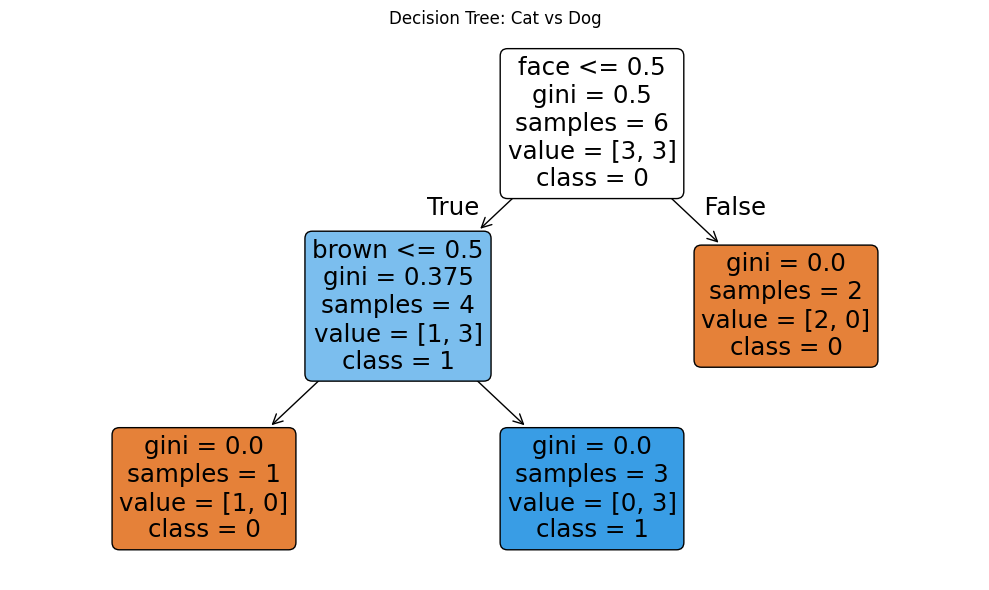

In [21]:
# นำเข้า Library สำหรับวาดต้นไม้
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_text
# ส่งโมเดลให้กับ Library สำหรับวาดต้นไม้ (plot_tree) (5 คะแนน)
plt.figure(figsize=(10,6))

tree.plot_tree(
    model,
    feature_names=feature_names,                    # ['face','ear','brown','tongue','whisker']
    class_names=[str(c) for c in label_encoder.classes_],  # แก้ตรงนี้
    filled=True,
    rounded=True
)
# ปรับแต่งกราฟที่ได้ให้สวยงาม
plt.title("Decision Tree: Cat vs Dog")
plt.tight_layout()
plt.show()


In [22]:
# วาดต้นไม้ในลักษณะที่แสดงเป็นข้อความ (export_text) ที่คนทั่วไปสามารถเข้าใจได้ (5 คะแนน)
tree_text = export_text(model, feature_names=feature_names)
print(tree_text)

|--- face <= 0.50
|   |--- brown <= 0.50
|   |   |--- class: 0
|   |--- brown >  0.50
|   |   |--- class: 1
|--- face >  0.50
|   |--- class: 0

